The purpose of this notebook is to explore the TCGA TARGET GTEX gene expression dataset.

# Librairies

In [1]:
import os
import sys
code_path = os.path.split(os.path.split(os.getcwd())[0])[0]
sys.path.append(code_path)

import json
import statsmodels.api as sm
from setting import *
from download_data import *
from dataset import *
from plots_and_stats import *
from utils import *
from loader import *

set_pyplot()

/projects/GraphNEx/anaconda3/envs/GraphNEx/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Path

In [2]:
name = 'ttg-all'  # ttg-all, ttg-breast
database = 'ttg'
save_path = get_save_path(name, code_path)
data_path = get_data_path(name)

# Dataset

In [3]:
X, y, class_name, feat_name = load_data(data_path, name)

# What is the unit used for the gene expression?

It is log2(count_uq+1). norm_count is the RSEM count normalized by the upper quartile method. It is mentioned [here](https://xenabrowser.net/datapages/?dataset=TcgaTargetGtex_RSEM_Hugo_norm_count&host=https%3A%2F%2Ftoil.xenahubs.net&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443) and [here](https://ucsc-xena.gitbook.io/project/how-do-i/tumor-vs-normal).

In [4]:
print("Minimal value in the dataset:", np.min(X))
print("Maximal value in the dataset:", np.round(np.max(X), 2))

Minimal value in the dataset: 0.0
Maximal value in the dataset: 28.11


In [5]:
# The percentile is centered around 100 with all genes. 
# Here, as some genes have been removed during preprocessing, it is lower.
# percentile = np.percentile(2**X - 1, 75, axis=1)
# plt.figure(figsize=(15, 4))
# plt.boxplot(percentile, vert=False)
# plt.yticks(color='w')
# plt.xlabel('75th percentile (a point = an individual sample)')
# plt.show()

# Visualisation

### Samples

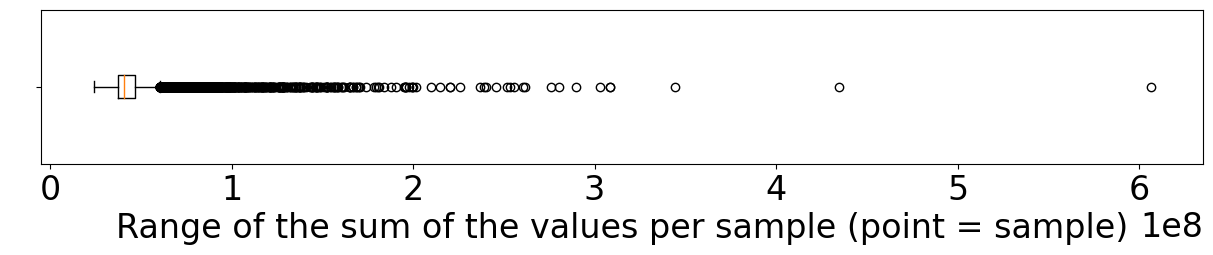

In [6]:
unit = 'log2(count_uq+1)'
plot_sum_of_features_for_each_sample(2**X - 1)

The normalized raw counts are between $0.1 \times 10^8$ and $6.1 \times 10^8$. 

Here are the range of values taken by some individuals.

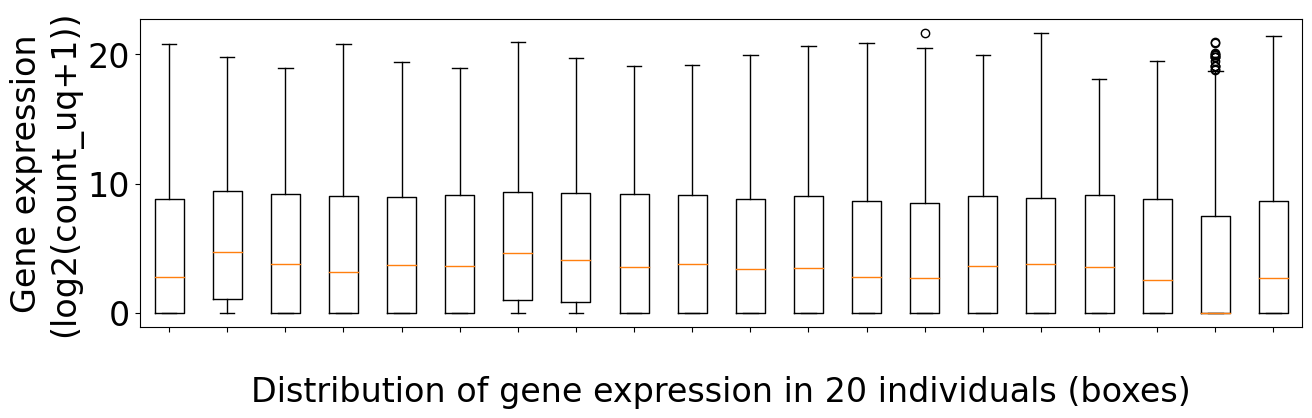

In [7]:
ylabel = f'Gene expression\n({unit})'
describe_random_individuals(X, ylabel)

# Distribution of the values of gene expression

In [8]:
# describe_gene_expression(2**X - 1, log_scale=False)

There are 0 genes whose average expression is 0.


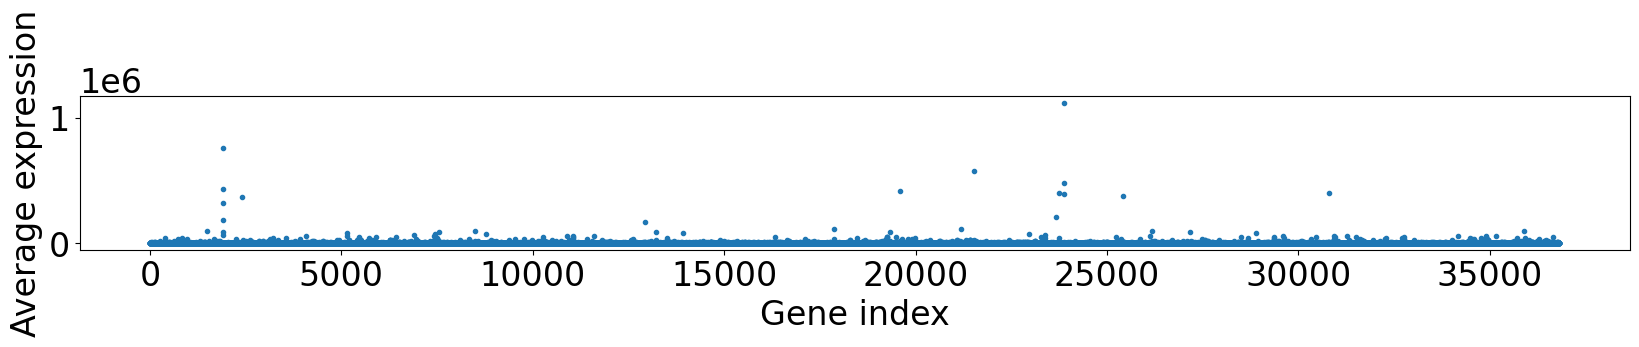

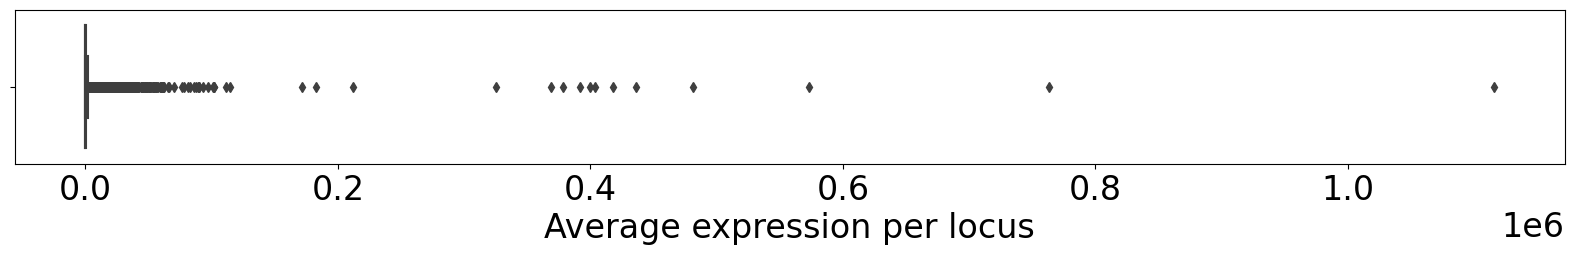

In [9]:
# criteria = 'average', 'median', 'std', 'min', 'max'
plot_stats_on_gene_expression(2**X - 1, criteria='average')

There are 10332 genes whose median expression is 0.


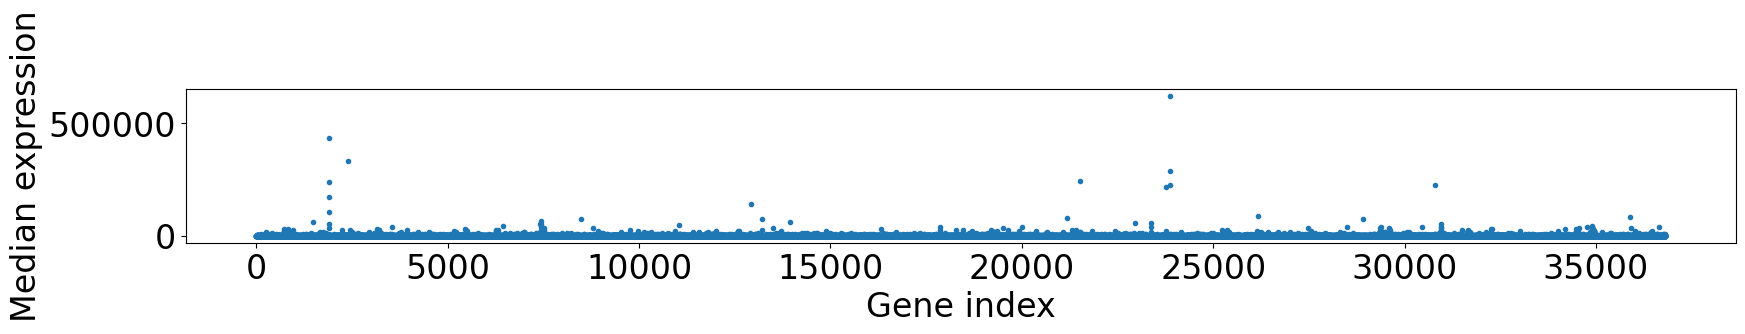

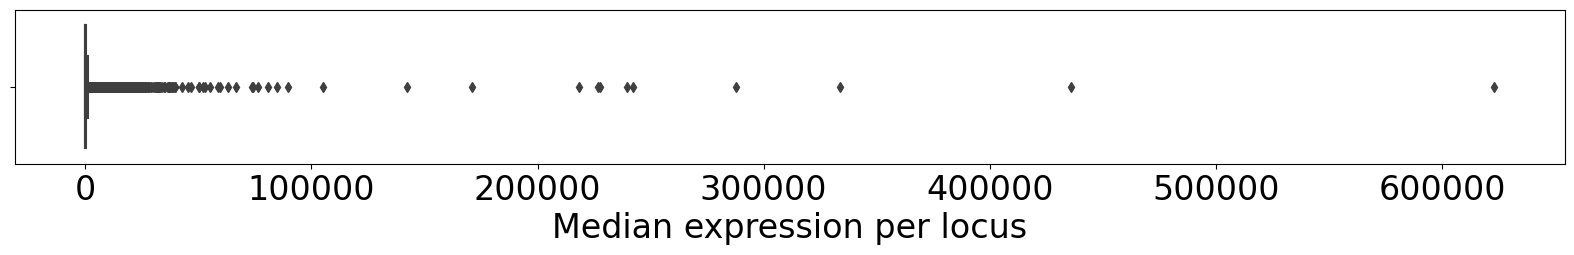

In [10]:
plot_stats_on_gene_expression(2**X - 1, criteria='median')

There are 0 genes whose maximum is 0.


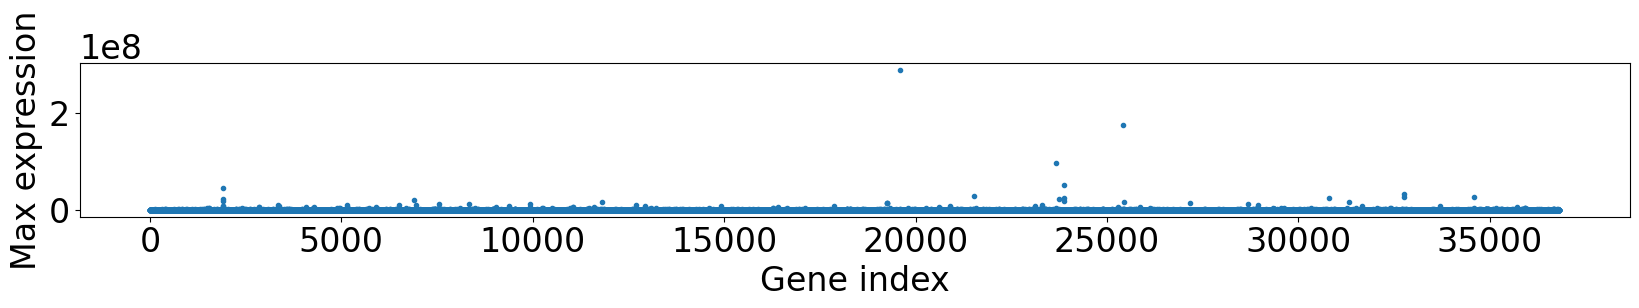

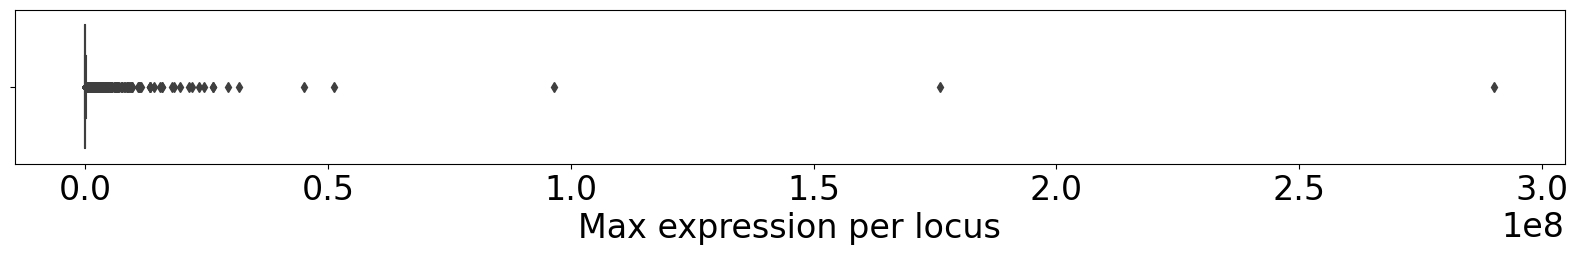

In [11]:
plot_stats_on_gene_expression(2**X - 1, criteria='max')

There are 0 genes whose average expression is 0.


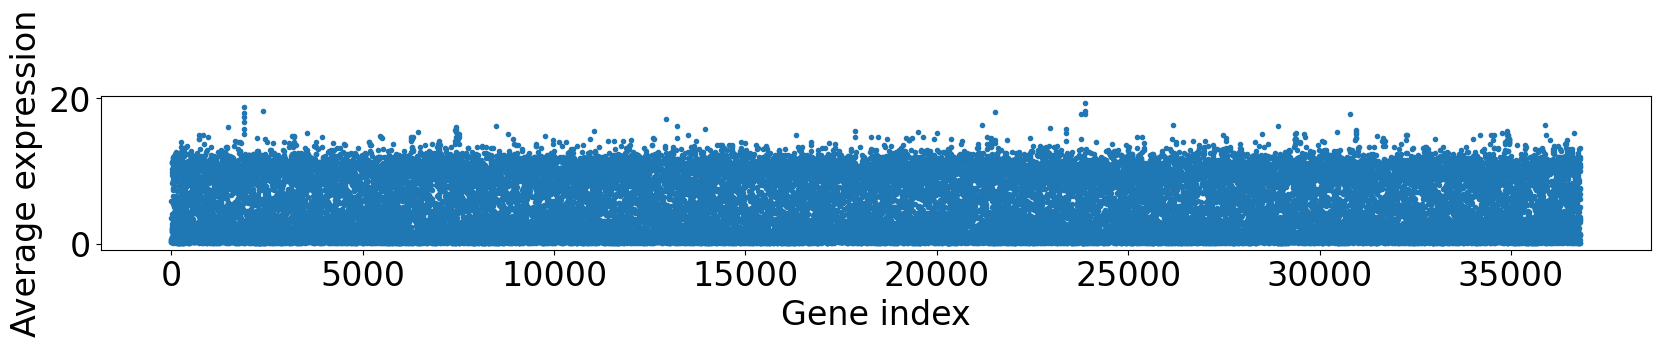

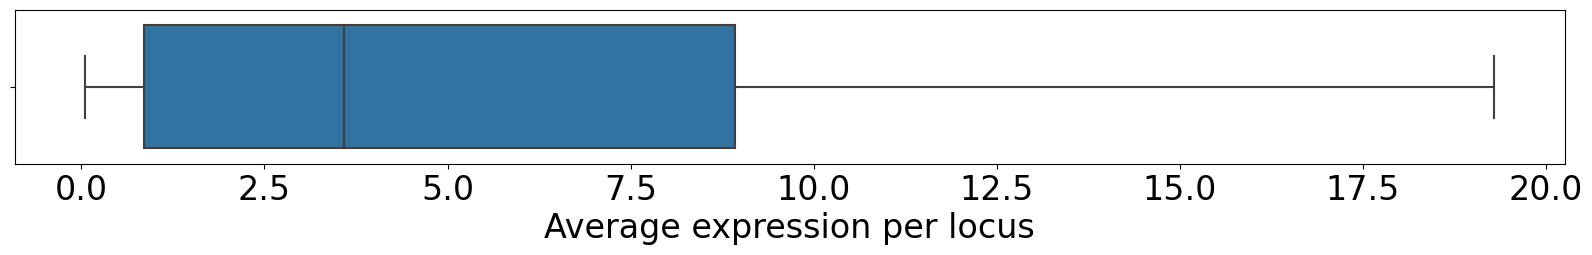

In [12]:
plot_stats_on_gene_expression(X, criteria='average')

Some genes have very high medians. They are often very active. Some genes have low medians. They are often expressed very weakly.

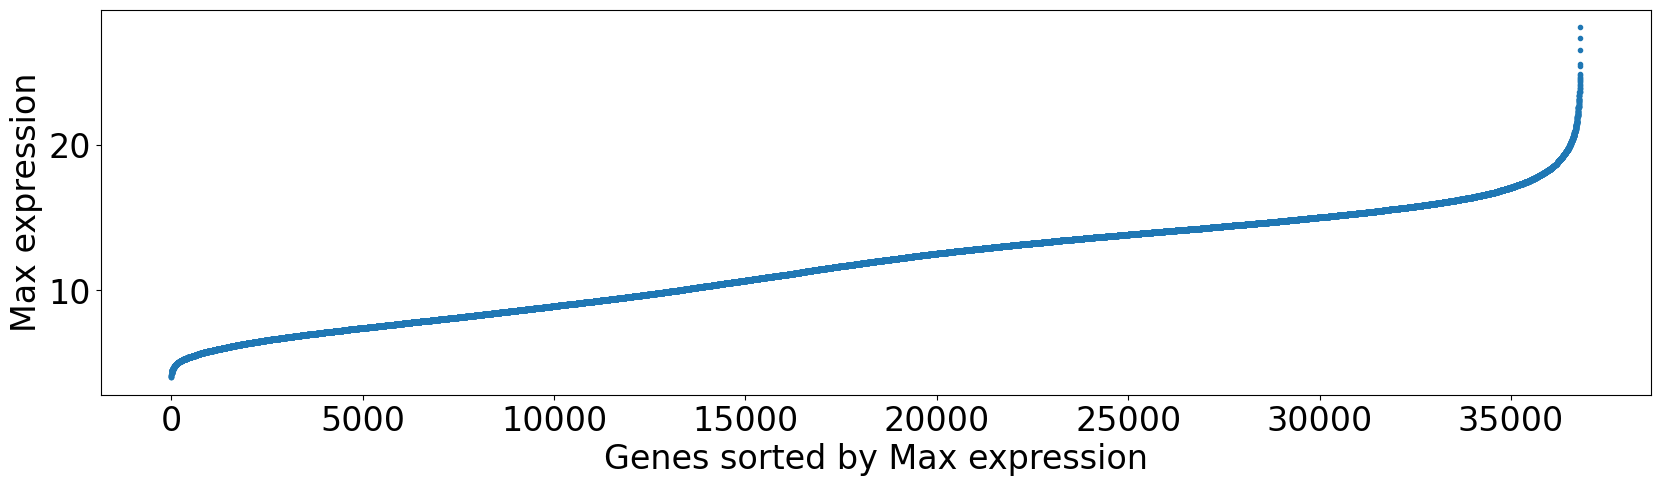

In [13]:
ordered_genes = sort_genes(X, criteria='max') # 'average', 'median', 'std', 'min', 'max'

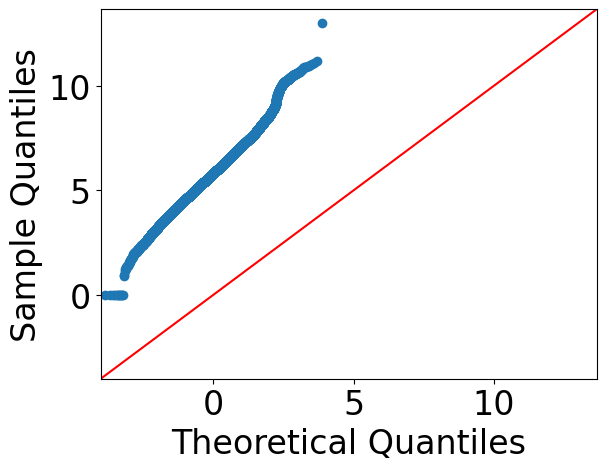

In [14]:
gene = 4
sm.qqplot(X[:, gene], line ='45')
plt.show()

# Analysis by class

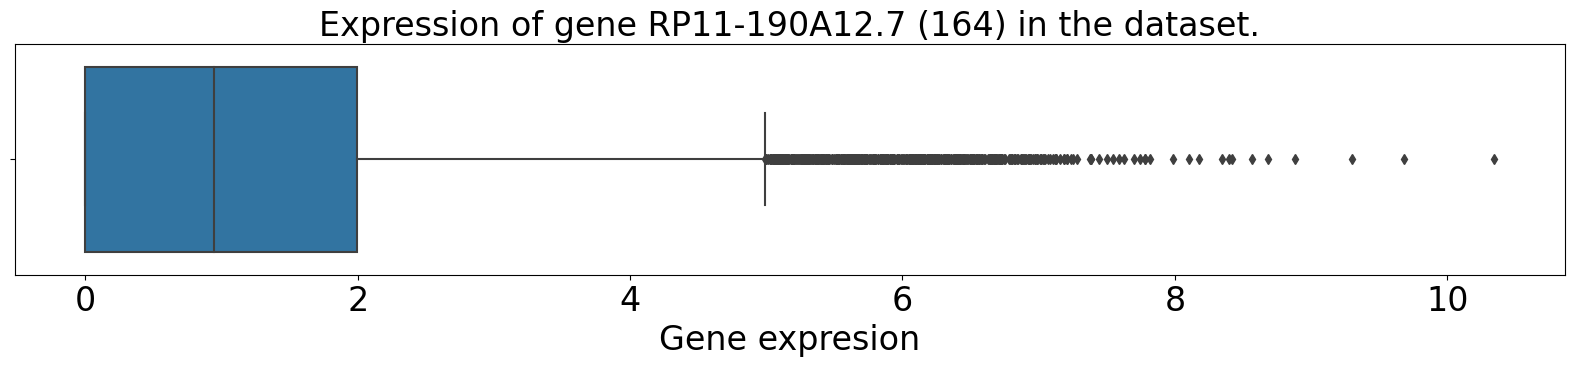

In [15]:
plot_random_gene_expression(X, y, feat_name, class_name, group_by_classes=False, gene_index=164)

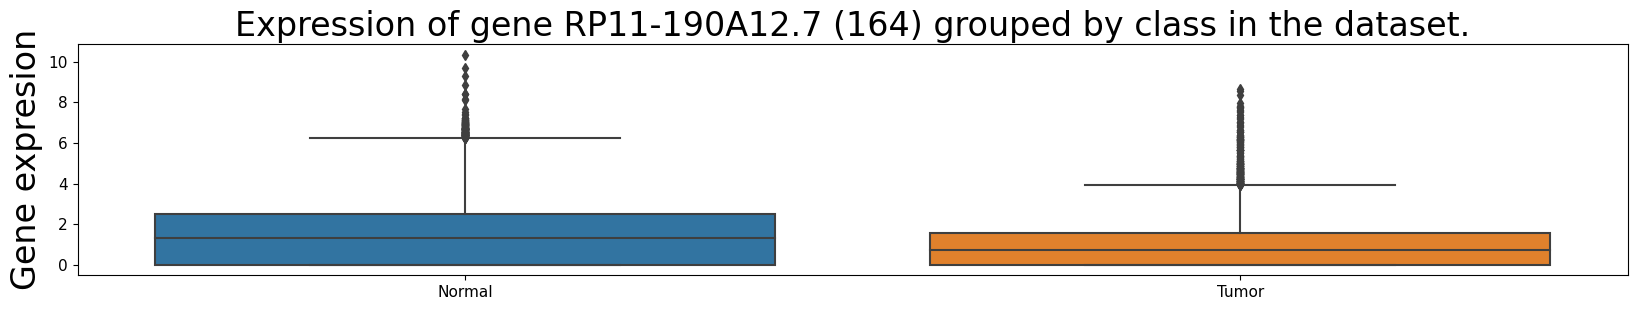

In [16]:
plot_random_gene_expression(X, y, feat_name, class_name, group_by_classes=True, gene_index=164)

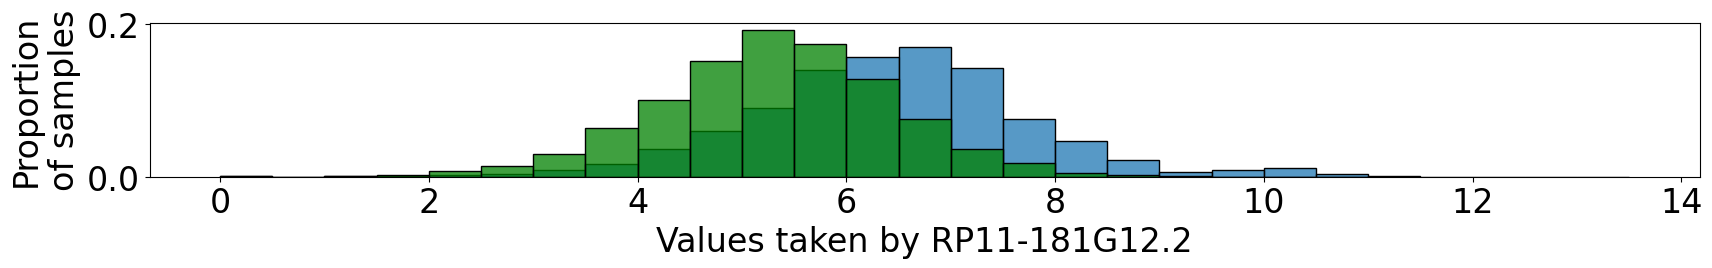

In [17]:
gene = 4
plt.figure(figsize=(20, 2))
sns.histplot(X[y==0, gene], binwidth=0.5, stat="proportion")
sns.histplot(X[y==1, gene], binwidth=0.5, stat="proportion", color='green')
plt.xlabel(f"Values taken by {feat_name[gene]}")
plt.ylabel("Proportion\nof samples")
plt.show()

In [18]:
# Code to find the index of a gene from its name.
# np.argwhere(np.array(feat_name) == 'RP11-190A12.7')

# Analysis by sample

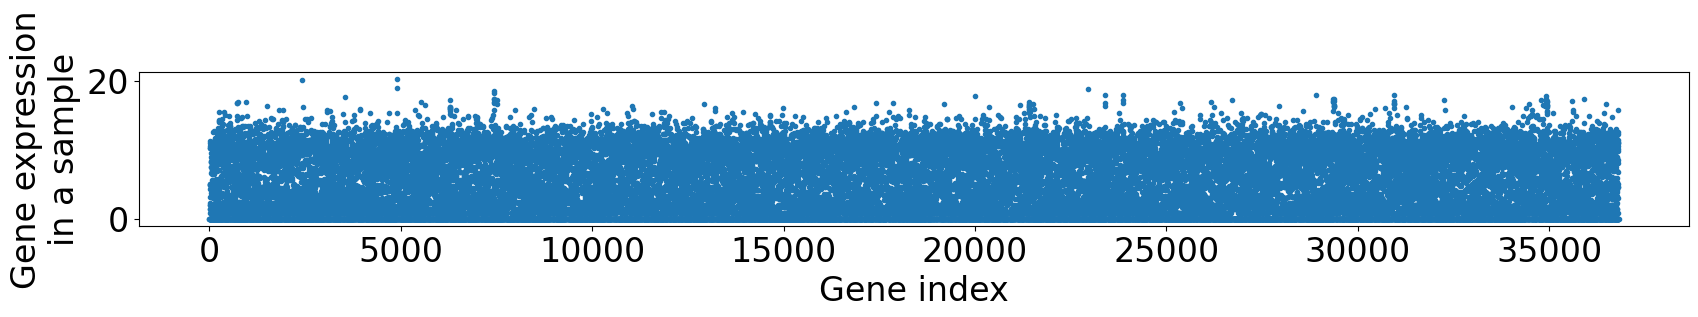

In [19]:
plot_random_sample_expression(X, index=27)

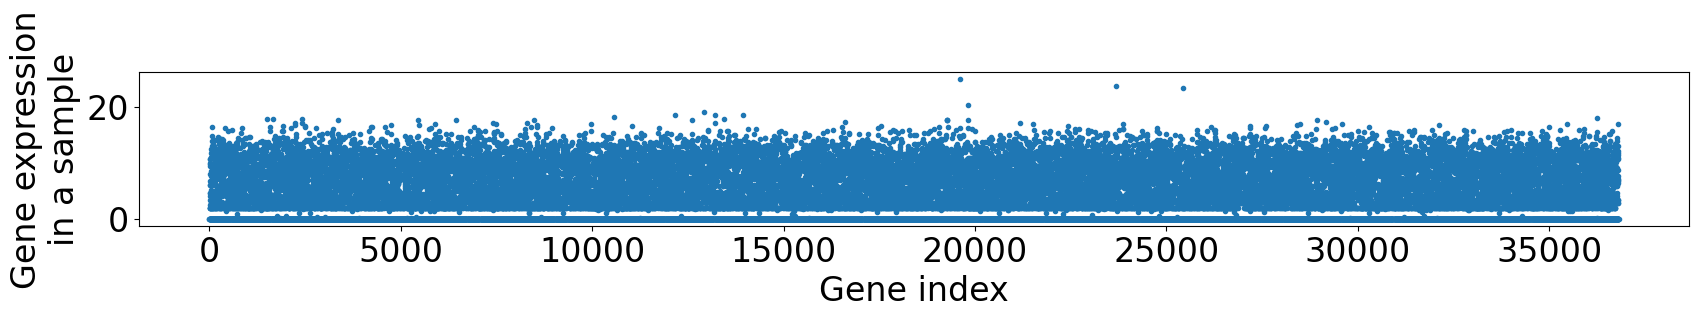

In [20]:
plot_random_sample_expression(X, index=31)